In [ ]:
#The providor of data gives us choice to solve the problem as a reggression or classificaiton problem. 
#In that case I did it as a classification problem.

In [59]:
#importing packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
#loading dataset
wines = pd.read_csv("winequality-red.csv")

In [3]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


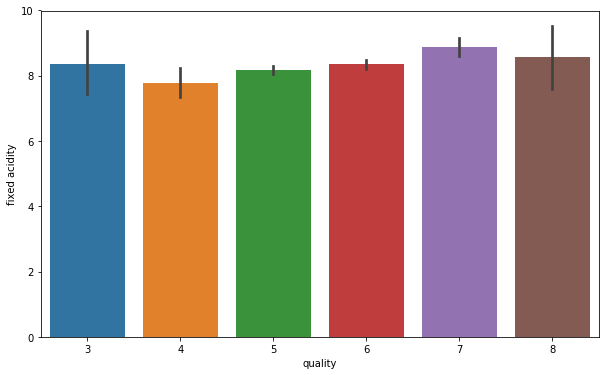

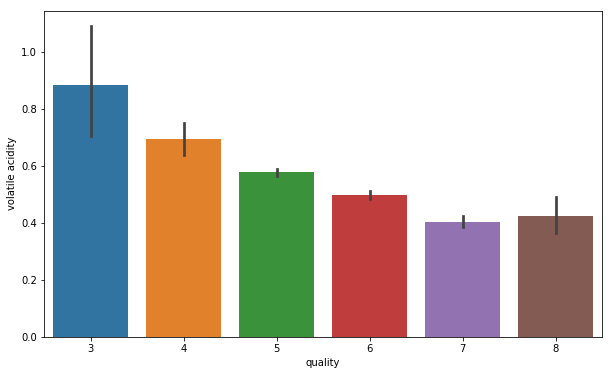

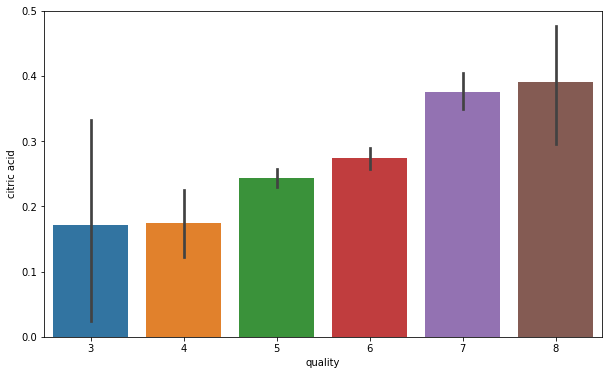

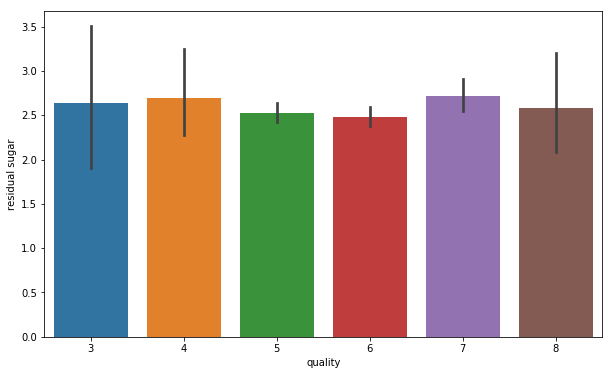

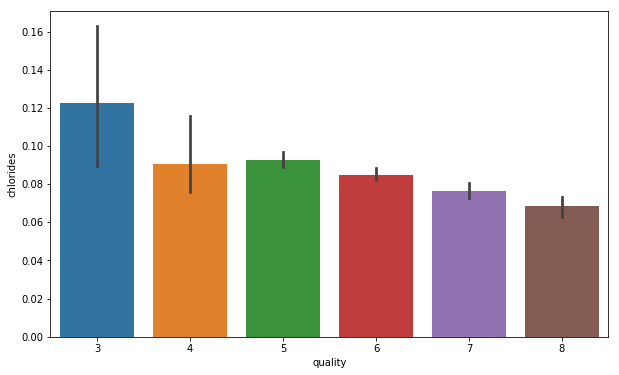

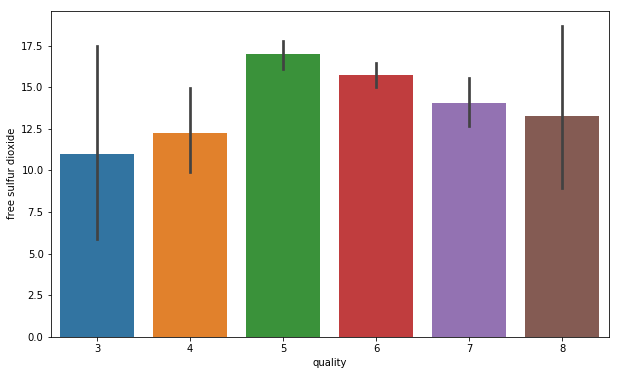

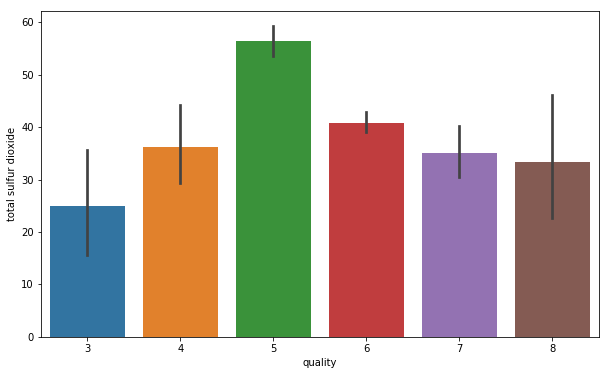

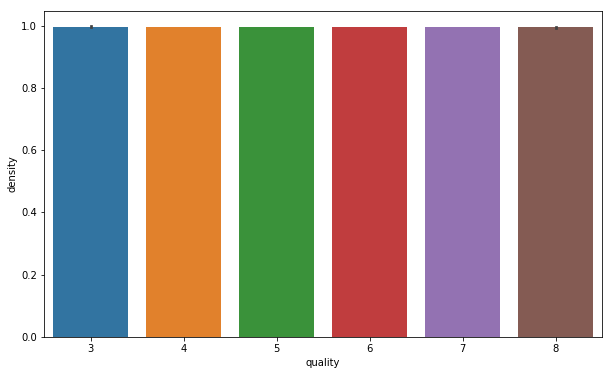

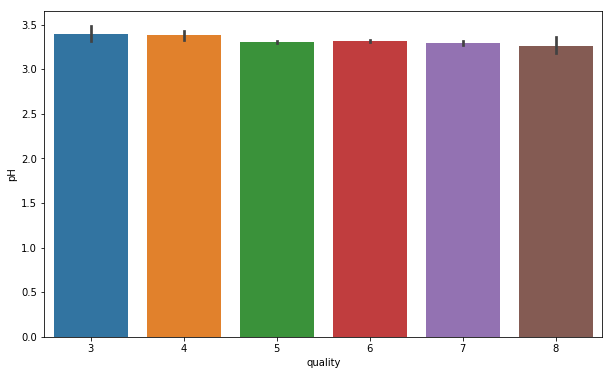

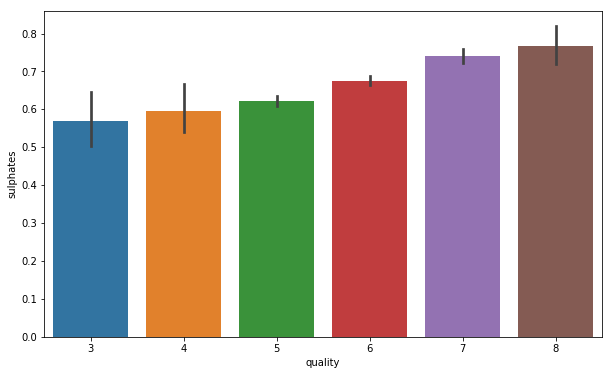

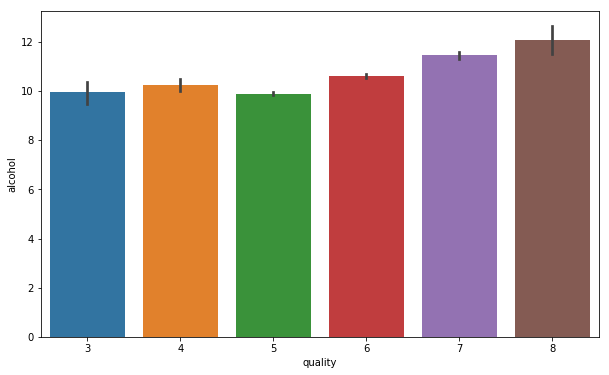

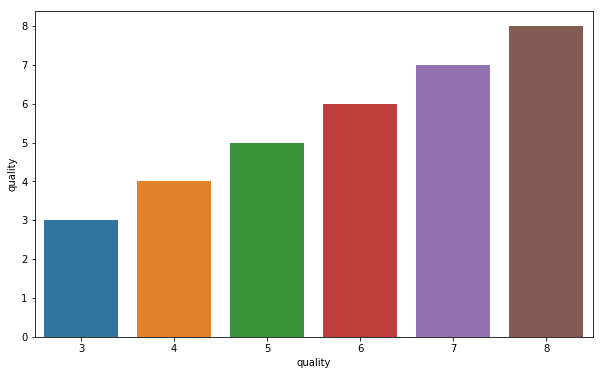

In [7]:
#plot the combinations of each feature with quality column
for feature in wines.columns:
    fig = plt.figure(figsize = (10,6))
    sns.barplot(x="quality", y=feature, data=wines)

In [8]:
#fixed acidity, residual sugar, density, pH can be deleted

In [9]:
wines.drop("fixed acidity", axis = 1, inplace= True)
wines.drop("residual sugar", axis = 1, inplace= True)
wines.drop("density", axis = 1, inplace= True)
wines.drop("pH", axis = 1, inplace= True)

In [10]:
wines.head()

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,0.70,0.00,0.076,11.0,34.0,0.56,9.4,5
1,0.88,0.00,0.098,25.0,67.0,0.68,9.8,5
2,0.76,0.04,0.092,15.0,54.0,0.65,9.8,5
3,0.28,0.56,0.075,17.0,60.0,0.58,9.8,6
4,0.70,0.00,0.076,11.0,34.0,0.56,9.4,5


In [11]:
#preprocessing with machine learning

In [12]:
bins = (3, 6.5, 8)
label_names = [ "bad", "good"]
wines["quality"] = pd.cut(wines["quality"], bins=bins, labels=label_names)

In [23]:
#checking if they are any nulls
wines.isnull().sum().sum()

10

In [24]:
#10 pieces shouldn't make a big difference because it is less then 0,6% of data
wines.dropna(inplace=True)

In [27]:
#transformin bad and good into 0, 1 values
labels_q = LabelEncoder()
wines["quality"] = labels_q.fit_transform(wines["quality"])

In [35]:
wines["quality"].value_counts()

0    1372
1     217
Name: quality, dtype: int64

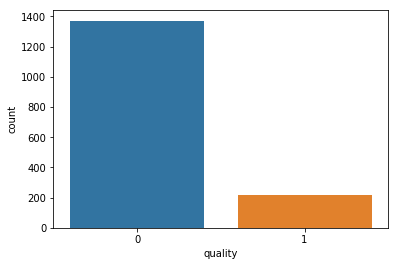

In [32]:
sns.countplot(wines["quality"])

In [37]:
#train and test splitting data
X = wines.drop("quality", axis = 1)
Y = wines["quality"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [40]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [44]:
#Time for some machine learning 

In [55]:
#Stochastic gradient descent
sgd = SGDClassifier(max_iter=1000, tol=1e-3, penalty=None)
sgd.fit(X_train, Y_train)
sgd_pred = sgd.predict(X_test)
print(classification_report(Y_test, sgd_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       361
           1       0.30      0.41      0.34        37

   micro avg       0.86      0.86      0.86       398
   macro avg       0.62      0.65      0.63       398
weighted avg       0.88      0.86      0.87       398



In [87]:
#SVC
svc =  SVC(gamma='auto')
svc.fit(X_train, Y_train)
svc_pred = svc.predict(X_test)
print(classification_report(Y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       361
           1       0.58      0.38      0.46        37

   micro avg       0.92      0.92      0.92       398
   macro avg       0.76      0.68      0.71       398
weighted avg       0.91      0.92      0.91       398



In [73]:
#i've got over 92% with svc let's try and use grid search cv now to find best parameters for my model
parameters = {
    'kernel':('linear', 'rbf'),
    'C':[i for i in np.arange(0.1, 1.5, 0.1)],
    'gamma':[i for i in np.arange(0.1, 1.5, 0.1)]
}
grid_svc = GridSearchCV(svc, param_grid=parameters, scoring='accuracy', cv=10)

In [74]:
grid_svc.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3000000000000003, 1.4000000000000001], 'gamma': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3000000000000003, 1.4000000000000001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [75]:
grid_svc.best_params_

{'C': 1.3000000000000003, 'gamma': 0.8, 'kernel': 'rbf'}

In [85]:
svc2 = SVC(C=1.3, gamma=0.8, kernel = 'rbf')
svc2.fit(X_train, Y_train)
svc2_pred = svc_improved.predict(X_test)
print(classification_report(Y_test, svc2_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       361
           1       0.47      0.46      0.47        37

   micro avg       0.90      0.90      0.90       398
   macro avg       0.71      0.70      0.71       398
weighted avg       0.90      0.90      0.90       398



In [88]:
#I've got worse results with gridsearchCV -- for further analyze